In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


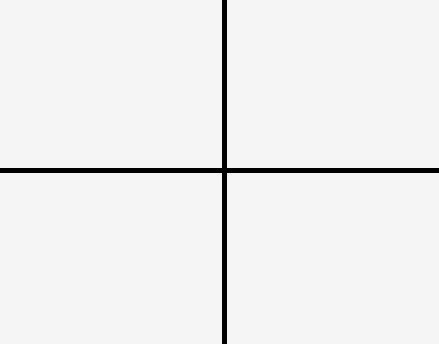

In [5]:
image_c = cv2.imread('horizontal_vertical.jpg')
# image_c = cv2.imread('calendar.jpg')

if image_c is None:
    print("Error: Image not found or failed to load.")
else:
    # Display the image using cv2_imshow instead of cv2.imshow
    cv2_imshow(image_c)

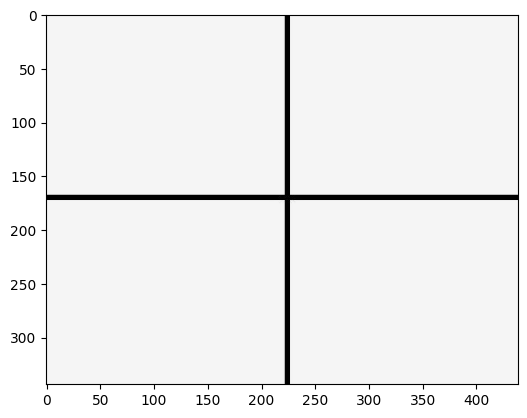

In [6]:
plt.imshow(image_c)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
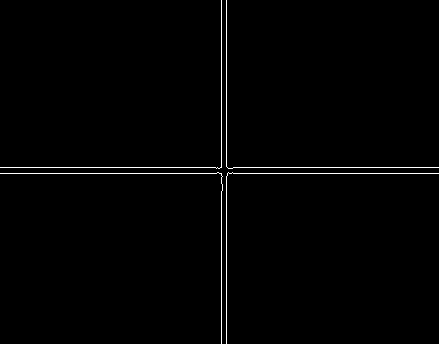

In [7]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
image_canny = cv2.Canny(image_g, 50, 200, apertureSize = 3)
image_canny

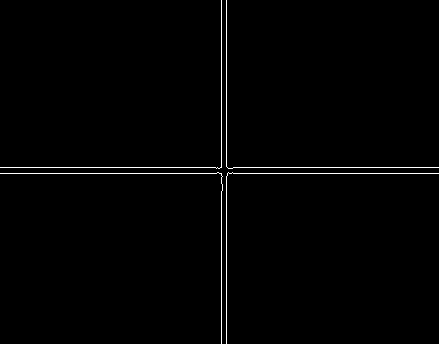

In [9]:
if image_c is None:
    print("Error: Image not found or failed to load.")
else:
    # Apply Canny edge detection
    image_canny = cv2.Canny(image_c, 100, 200)

    # Display the Canny image using cv2_imshow
    cv2_imshow(image_canny)

In [10]:
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 300)

In [11]:
lines

array([[[173.       ,   1.5707964]],

       [[167.       ,   1.5707964]],

       [[226.       ,   0.       ]],

       [[221.       ,   0.       ]]], dtype=float32)

In [12]:
lines.shape

(4, 1, 2)

Line 1: rho = 173.0, theta = 1.5707963705062866
Line 2: rho = 167.0, theta = 1.5707963705062866
Line 3: rho = 226.0, theta = 0.0
Line 4: rho = 221.0, theta = 0.0


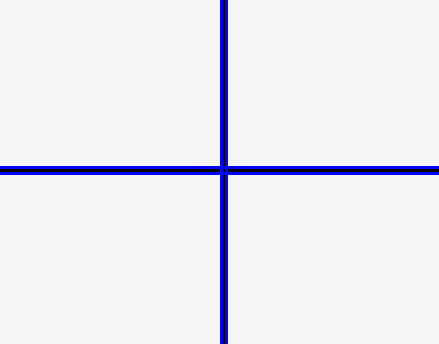

In [16]:
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]

            # Print the rho and theta values
            print(f"Line {i + 1}: rho = {rho}, theta = {theta}")

            # Calculate the endpoints for each line to be drawn
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            # Draw the line on the image
            cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display the image with the detected Hough lines
cv2_imshow(image_c)